<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Neural Networks

## *Data Science Unit 4 Sprint 2 Assignment 1*

## Define the Following:
You can add image, diagrams, whatever you need to ensure that you understand the concepts below.

### Input Layer: 
- The input layer is what receives input from our dataset. Sometimes it is called the visible layer because it's the only part that is exposed to our data and that our data interacts with directly. Typically node maps are drawn with one input node for each of the different inputs/features/columns of our dataset that will be passed to the network.


### Hidden Layer:
- Layers after the input layer are called Hidden Layers. This is because they cannot be accessed except through the input layer. They're inside of the network and they perform their functions, but we don't directly interact with them. The simplest possible network is to have a single neuron in the hidden layer that just outputs the value. "Deep Learning" apart from being a big buzzword simply means that we are using a Neural Network that has multiple hidden layers.


### Output Layer:
- The final layer is called the Output Layer. The purpose of the output layer is to output a vector of values that is in a format that is suitable for the type of problem that we're trying to address. Typically the output value is modified by an "activation function" to transform it into a format that makes sense for our context.


### Neuron:
- Artifical neurons or "nodes" that are similar to brain neurons in that they receive inputs and pass on their signal to the next layer of nodes if a certain threshold is reached, but that's about where the similarities end.


### Weight:
- Are values multiplied to the different inputs in order to determine how important or nonimportant features are to the desired output. 


### Activation Function:
- Typically the output value is modified by an "activation function" to transform it into a format that makes sense for our context. This helps eliminate the outliers that would dominate the data and bring values to 0 or 1. 


### Node Map:
![A Mapping](http://jalammar.github.io/images/NNs_formula_no_bias.png)
Takes an input, modified by a weight and then reports an output.



### Perceptron:
- The first and simplest kind of neural network that we could talk about is the perceptron. A perceptron is just a single node or neuron of a neural network with nothing else. It can take any number of inputs and spit out an output. What a neuron does is it takes each of the input values, multiplies each of them by a weight, sums all of these products up, and then passes the sum through what is called an "activation function" the result of which is the final value.


## Inputs -> Outputs

### Explain the flow of information through a neural network from inputs to outputs. Be sure to include: inputs, weights, bias, and activation functions. How does it all flow from beginning to end?

#### Your Answer Here

The inputs receieve the data from the dataset, they go into the hidden layer where their weights are assigned and biased found to get these values to the proper outputs that would help to provide a better solution for the output value. Usually under the hidden layer the activation function helps normalize all the data to 0 or 1 depending on its numerical value so that there is no crazy outliers that skew the data.

## Write your own perceptron code that can correctly classify (99.0% accuracy) a NAND gate. 

| x1 | x2 | y |
|----|----|---|
| 0  | 0  | 1 |
| 1  | 0  | 1 |
| 0  | 1  | 1 |
| 1  | 1  | 0 |

In [1]:
import pandas as pd
import numpy as np

data = { 'x1': [0,1,0,1],
         'x2': [0,0,1,1],
         'y':  [1,1,1,0]
       }

df = pd.DataFrame.from_dict(data).astype('int')

In [2]:
df.head()

,x1,x2,y
0,0,0,1
1,1,0,1
2,0,1,1
3,1,1,0


In [3]:
correct_outputs = [[1], [1],[1], [0]]

In [4]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))
#Sigmoid function

def sigmoid_derivative(x):
    sx = sigmoid(x)
    return sx * (1-sx)

In [5]:
weights = 2 * np.random.random((3,1))-1
weights

array([[-0.2159872 ],
       [-0.21475823],
       [-0.20836819]])

In [6]:
# Update our weights 10,000 times - (fingers crossed that this process reduces error)
for iteration in range(10000):
    
    # Weighted sum of inputs / weights
    weighted_sum = np.dot(df, weights)
    
    # Activate!
    activated_output = sigmoid(weighted_sum)
    
    # Cac error
    error = correct_outputs - activated_output
    
    adjustments = error * sigmoid_derivative(weighted_sum)
    
    # Update the Weights
    weights += np.dot(df.T, adjustments)
    
print("Weights after training")
print(weights)

print("Output after training")
print(activated_output)

Weights after training
[[-2.4102438 ]
 [-2.41023898]
 [ 7.49025995]]
Output after training
[[0.99944177]
 [0.99381833]
 [0.99381836]
 [0.00799881]]


## Implement your own Perceptron Class and use it to classify a binary dataset: 
- [The Pima Indians Diabetes dataset](https://raw.githubusercontent.com/ryanleeallred/datasets/master/diabetes.csv) 

You may need to search for other's implementations in order to get inspiration for your own. There are *lots* of perceptron implementations on the internet with varying levels of sophistication and complexity. Whatever your approach, make sure you understand **every** line of your implementation and what its purpose is.

In [7]:
diabetes = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/diabetes.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Although neural networks can handle non-normalized data, scaling or normalizing your data will improve your neural network's learning speed. Try to apply the sklearn `MinMaxScaler` or `Normalizer` to your diabetes dataset. 

In [46]:
from sklearn.preprocessing import MinMaxScaler, Normalizer

scaler = MinMaxScaler()

feats = list(diabetes)[:-1]

X = scaler.fit_transform(diabetes[feats])

y = np.array(diabetes["Outcome"])

X, y

(array([[0.35294118, 0.74371859, 0.59016393, ..., 0.50074516, 0.23441503,
         0.48333333],
        [0.05882353, 0.42713568, 0.54098361, ..., 0.39642325, 0.11656704,
         0.16666667],
        [0.47058824, 0.91959799, 0.52459016, ..., 0.34724292, 0.25362938,
         0.18333333],
        ...,
        [0.29411765, 0.6080402 , 0.59016393, ..., 0.390462  , 0.07130658,
         0.15      ],
        [0.05882353, 0.63316583, 0.49180328, ..., 0.4485842 , 0.11571307,
         0.43333333],
        [0.05882353, 0.46733668, 0.57377049, ..., 0.45305514, 0.10119556,
         0.03333333]]),
 array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
        0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
        1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1

In [47]:
class Perceptron(object):
    
    def __init__(self, rate = 0.01, niter = 10):
        self.rate = rate
        self.niter = niter
        
    def fit(self, X, y):
        """Fit training data
        X : Training vectors, X.shape : [#samples, #features]
        y : Target values, y.shape : [#samples]
        """

        # weights
        self.weight = np.zeros(1 + X.shape[1])

        # Number of misclassifications
        self.errors = []  # Number of misclassifications

        for i in range(self.niter):
            err = 0
            for xi, target in zip(X, y):
                delta_w = self.rate * (target - self.predict(xi))
                self.weight[1:] += delta_w * xi
                self.weight[0] += delta_w
                err += int(delta_w != 0.0)
            self.errors.append(err)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.weight[1:]) + self.weight[0]
    
    #Can apply stochastic gradient descent function here
    
    
    def predict(self, X):
        """Return class label after unit step"""
        """ Default Step Function"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)


In [49]:
import matplotlib.pyplot as plt

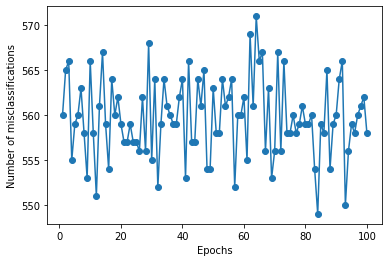

In [50]:
#Fit perceptron on X and y
pn = Perceptron(0.01, 100)
pn.fit(X, y)
plt.plot(range(1, len(pn.errors) + 1), pn.errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()


In [51]:
print('Accuracy is: ', accuracy_score(y, y_pred))

Accuracy is:  0.6510416666666666


## Stretch Goals:

- Research "backpropagation" to learn how weights get updated in neural networks (tomorrow's lecture). 
- Implement a multi-layer perceptron. (for non-linearly separable classes)
- Try and implement your own backpropagation algorithm.
- What are the pros and cons of the different activation functions? How should you decide between them for the different layers of a neural network?